In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline

In [120]:
GOT_deathdata_path = "Resources/GOT_data_set.csv"

In [121]:
GOT_df = pd.read_csv(GOT_deathdata_path)
GOT_df.head()

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0


In [122]:
GOT_df.rename(columns={"order": "Order", "season": "Season", "episode":"Episode", "character_killed":"Character Killed", "killer":"Killer", 
                       "method":"Method", "method_cat":"Method Category", "reason":"Reason", "location":"Location", 
                       "allegiance":"Allegiance", "importance":"Importance"}, inplace=True)

GOT_df

,Order,Season,Episode,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6882,6883,8,5,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,8,5,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,8,5,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,8,6,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0


In [123]:
GOT_df.drop(columns={"Season","Episode"})

,Order,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
0,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
...,...,...,...,...,...,...,...,...,...
6882,6883,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0


Most Dangerous Areas (by Kingdom)

In [175]:
#Identify the deadliest locations and put the results into a panda data frame. I will utilize the top 5.
death_location = GOT_df["Location"].value_counts()
death_location_df = pd.DataFrame(death_location)
death_location_df.head(5)

,Location
Winterfell,3709
King’s Landing,1357
Beyond the Wall,993
Meereen,154
Goldroad,116


In [125]:
#Narrow down the deaths just in Winterfell
Death_in_Winterfell_df = GOT_df.loc[GOT_df["Location"]== "Winterfell",:]
Death_in_Winterfell_df

,Order,Season,Episode,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,None,1.0
28,29,1,6,Wallen,Robb Stark,Sword,Blade,Attacked Bran Stark,Winterfell,Free Folk,2.0
...,...,...,...,...,...,...,...,...,...,...,...
5857,5858,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,None,1.0
5858,5859,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,None,1.0
5859,5860,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,None,1.0
5860,5861,8,3,Jorah Mormont,Wight,Sword,Blade,Killed during the Battle of Winterfell when de...,Winterfell,"House Targaryen, House Mormont",4.0


In [179]:
#Narrow down the top 10 killeris in Winterfell
WF_Killers = Death_in_Winterfell_df["Killer"].value_counts()
WF_Killers_df = pd.DataFrame(WF_Killers)
WF_Killers_df.head(15)

,Killer
Wight,1558
Arya Stark,1215
Drogon,373
Rhaegal,102
Bolton soldier,90
Stark soldier,44
None,41
Jon Snow,35
Jorah Mormont,26
Theon Greyjoy,26


In [195]:
Kill_percentWF = Death_in_Winterfell_df["Killer"].value_counts()
KP_result = Kill_percentWF.div(3709).round(4)
KPR_percent = KP_result*100
KPR_percent

Wight                                   42.01
Arya Stark                              32.76
Drogon                                  10.06
Rhaegal                                  2.75
Bolton soldier                           2.43
Stark soldier                            1.19
None                                     1.11
Jon Snow                                 0.94
Jorah Mormont                            0.70
Theon Greyjoy                            0.70
Tormund                                  0.57
Unknown                                  0.49
Greyjoy (Yara-aligned) soldier           0.46
Brienne of Tarth                         0.46
Jaime Lannister                          0.32
Arryn soldier                            0.32
Sandor “the Hound” Clegane               0.27
Ramsay Bolton                            0.24
Horse                                    0.22
Giant wight                              0.22
Gendry                                   0.19
Grey Worm                         

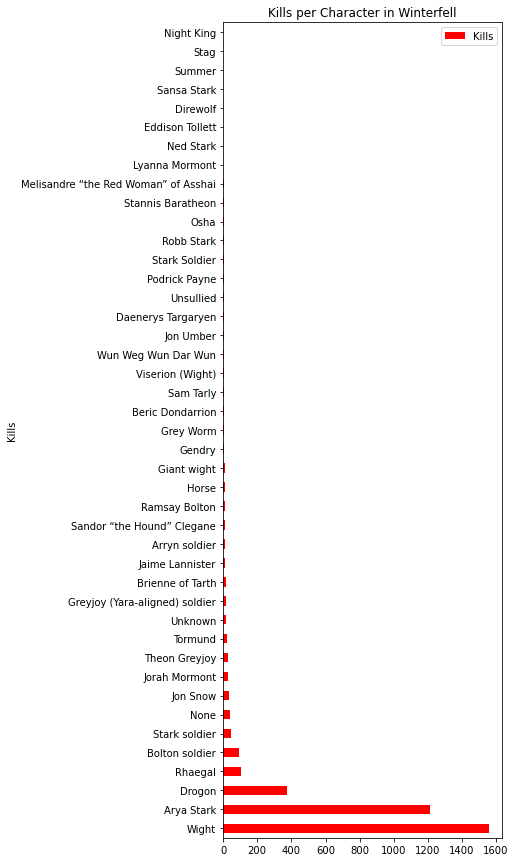

In [198]:
ax = WF_Killers_df.plot.barh(rot=0,color='r',figsize=(5,15))
plt.title("Kills per Character in Winterfell")
plt.ylabel("Kills")
plt.legend(["Kills"])
#for index, data in enumerate(y):
    #plt.text(x=index, y= data, s=f"{value}", ha="center", fontsize= 50)
    #plt.text(value, index,
             #str(value))
#plt.show()

In [128]:
#Code to show death in Winterfell, subtracting the Battle of Winterfell deaths that occured simultaneously with the death of Night King which skewed the data
USWF_DIW = Death_in_Winterfell_df[Death_in_Winterfell_df["Reason"].str.contains("Killed during the Battle of Winterfell when the Night King falls")==False]
USWF_DIW.head()

,Order,Season,Episode,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,None,1.0
28,29,1,6,Wallen,Robb Stark,Sword,Blade,Attacked Bran Stark,Winterfell,Free Folk,2.0


In [129]:

WF_Killers = USWF_DIW["Killer"].value_counts()
WF_Killers_df = pd.DataFrame(WF_Killers)
WF_Killers_df.head(10)

,Killer
Wight,1558
Drogon,373
Rhaegal,102
Bolton soldier,90
Stark soldier,44
None,41
Jon Snow,35
Jorah Mormont,26
Theon Greyjoy,26
Arya Stark,24


In [165]:
#Narrow down the top 10

#  for amount of people who died per allegiance in Winterfell
Deathby_allegiance_WF = Death_in_Winterfell_df["Allegiance"].value_counts()
Deathby_allegiance_WF.head(10)

None                                         2701
House Targaryen                               781
House Stark                                   113
House Bolton                                   77
House Mormont, House Stark                      8
House Greyjoy (Yara-aligned), House Stark       7
House Baratheon of Dragonstone                  4
Free Folk                                       3
Smallfolk                                       2
House Stark, Free Folk                          2
Name: Allegiance, dtype: int64

In Winterfell, the #1 most dangerous location in Westeros, ** was the most dangerous Killer. ** was responsible for **% of the death in Winterfell, killing ** people. It was most dangerous to be aligned with ** while in Winterfell, as that allegiance account for **% of all deaths with a sum of ** during the Ice and Fire era.

The battle of Winterfell skews this information as 
Arya Stark recieves credit for 1191 kills solely from killing the Night King, as his minionsdied with him. "Killed during the Battle of Winterfell when the Night King falls"

In [49]:
#Narrow down the deaths just in King's Landing
Death_in_KL_df = GOT_df.loc[GOT_df["Location"]== "King’s Landing",:]
Death_in_KL_df

,Order,Season,Episode,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
5,6,1,1,Jon Arryn,Lysa Arryn,Poison,Poison,Petyr Baelish persuaded Lysa to do so for reas...,King’s Landing,House Arryn,2.0
10,11,1,4,Ser Hugh of the Vale,Gregor “the Mountain” Clegane,Spear,Polearm,Killed during a tournament,King’s Landing,House Arryn,2.0
11,12,1,5,Clegane’s horse,Gregor “the Mountain” Clegane,Sword,Blade,Gregor was angry at being unhorsed in the tour...,King’s Landing,House Clegane,1.0
21,22,1,5,Stark soldier,Lannister soldier,Spear,Polearm,Jamie Lannister attacked because Catelyn Stark...,King’s Landing,House Stark,1.0
22,23,1,5,Stark soldier,Lannister soldier,Spear,Polearm,Jamie Lannister attacked because Catelyn Stark...,King’s Landing,House Stark,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6882,6883,8,5,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,8,5,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,8,5,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,8,6,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0


In [50]:
KL_Killers = Death_in_KL_df["Killer"].value_counts()
KL_Killers.head(10)

Drogon                                 917
Cersei Lannister                       199
Stark soldier                           52
Baratheon of King’s Landing soldier     32
Dothraki rider                          20
Bronn                                   15
Sandor “the Hound” Clegane              14
Grey Worm                               14
Baratheon of Dragonstone soldier        11
Jon Snow                                10
Name: Killer, dtype: int64